## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Reading the files

In [3]:
car_df = pd.read_csv("Car details v3.csv")
bike_df = pd.read_csv("Bikes Best Buy.csv")

In [4]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
car_df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


### Null checking

In [6]:
car_df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [7]:
bike_df.isna().sum()

Bike Name          0
Milage (kM/L)      0
Tank size (cc)     0
Price(INR)         0
Fuel               0
Company            0
dtype: int64

<AxesSubplot:>

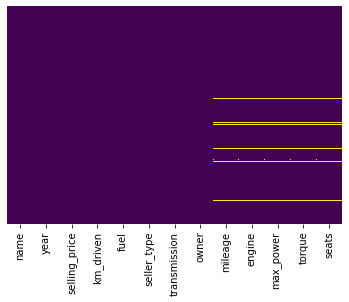

In [8]:
sns.heatmap(car_df.isnull(), yticklabels=False, cbar=False, cmap = "viridis")

<AxesSubplot:>

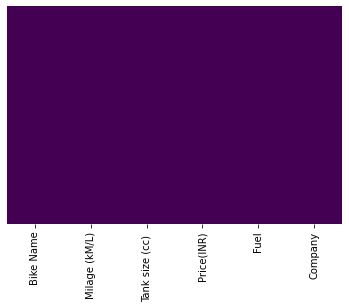

In [9]:
sns.heatmap(bike_df.isnull(), yticklabels=False, cbar=False, cmap = "viridis")

In [10]:
car_df['Year_Old'] = 2020 - car_df['year']

In [11]:
car_df.drop(["owner", "seats", "seller_type", "name", "max_power", "torque", "year"], axis = 1, inplace = True)
car_df.shape

(8128, 7)

In [12]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   selling_price  8128 non-null   int64 
 1   km_driven      8128 non-null   int64 
 2   fuel           8128 non-null   object
 3   transmission   8128 non-null   object
 4   mileage        7907 non-null   object
 5   engine         7907 non-null   object
 6   Year_Old       8128 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 444.6+ KB


### Checking for duplicates and then droping them

In [13]:
car_df.duplicated().sum()

1256

In [14]:
car_df.drop_duplicates(inplace=True)

In [15]:
car_df.shape

(6872, 7)

In [16]:
car_df.dropna(subset = ['mileage'], inplace = True)

In [17]:
car_df.shape

(6665, 7)

In [18]:
def find_number(text):
    num = re.findall(r'[0-9]+',text)
    return " ".join(num)
car_df['engine']=car_df['engine'].apply(lambda x: find_number(x))

In [19]:
car_df['mileage']=car_df['mileage'].apply(lambda x: find_number(x))

In [20]:
car_df['mileage'] = car_df['mileage'].str.replace(' ', '.')

In [21]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6665 entries, 0 to 8125
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   selling_price  6665 non-null   int64 
 1   km_driven      6665 non-null   int64 
 2   fuel           6665 non-null   object
 3   transmission   6665 non-null   object
 4   mileage        6665 non-null   object
 5   engine         6665 non-null   object
 6   Year_Old       6665 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 416.6+ KB


In [22]:
car_df[['engine']] = car_df[['engine']].astype("int")
car_df[['mileage']] = car_df[['mileage']].astype("float")

In [23]:
car_df

,selling_price,km_driven,fuel,transmission,mileage,engine,Year_Old
0,450000,145500,Diesel,Manual,23.40,1248,6
1,370000,120000,Diesel,Manual,21.14,1498,6
2,158000,140000,Petrol,Manual,17.70,1497,14
3,225000,127000,Diesel,Manual,23.00,1396,10
4,130000,120000,Petrol,Manual,16.10,1298,13
...,...,...,...,...,...,...,...
8121,260000,50000,Petrol,Manual,18.90,998,7
8122,475000,80000,Diesel,Manual,22.54,1396,6
8123,320000,110000,Petrol,Manual,18.50,1197,7
8124,135000,119000,Diesel,Manual,16.80,1493,13


In [24]:
car_df["transmission"].value_counts()

Manual       6090
Automatic     575
Name: transmission, dtype: int64

In [25]:
a = pd.get_dummies(car_df['transmission'], drop_first=True)
car_df = car_df.join(a)

In [26]:
car_df["fuel"].value_counts()

Diesel    3634
Petrol    2944
CNG         52
LPG         35
Name: fuel, dtype: int64

In [27]:
car_df['fuel'].replace('LPG', 'CNG', inplace = True)

In [28]:
car_df["fuel"].value_counts()

Diesel    3634
Petrol    2944
CNG         87
Name: fuel, dtype: int64

In [29]:
a = pd.get_dummies(car_df['fuel'])
car_df = car_df.join(a)

In [30]:
car_df.head()

,selling_price,km_driven,fuel,transmission,mileage,engine,Year_Old,Manual,CNG,Diesel,Petrol
0,450000,145500,Diesel,Manual,23.40,1248,6,1,0,1,0
1,370000,120000,Diesel,Manual,21.14,1498,6,1,0,1,0
2,158000,140000,Petrol,Manual,17.70,1497,14,1,0,0,1
3,225000,127000,Diesel,Manual,23.00,1396,10,1,0,1,0
4,130000,120000,Petrol,Manual,16.10,1298,13,1,0,0,1


In [31]:
car_df.drop(["fuel", "transmission"], axis = 1, inplace = True)
car_df["E"] = 0
car_df.shape

(6665, 10)

In [32]:
car_df.rename({'selling_price':'Price (INR)', 'mileage':'Mileage', 'km_driven':'KM_Driven', 'engine':'Engine (cc)', 'Diesel':'D', 'CNG':'G', 'Petrol':'P'}, axis = 1, inplace = True)
car_df.head()

,Price (INR),KM_Driven,Mileage,Engine (cc),Year_Old,Manual,G,D,P,E
0,450000,145500,23.40,1248,6,1,0,1,0,0
1,370000,120000,21.14,1498,6,1,0,1,0,0
2,158000,140000,17.70,1497,14,1,0,0,1,0
3,225000,127000,23.00,1396,10,1,0,1,0,0
4,130000,120000,16.10,1298,13,1,0,0,1,0


In [33]:
titles = ['Price (INR)', 'Engine (cc)', 'Year_Old', 'KM_Driven', 'Manual', 'D', 'G', 'P', 'E', 'Mileage']
car_df = car_df[titles]
car_df.head()

,Price (INR),Engine (cc),Year_Old,KM_Driven,Manual,D,G,P,E,Mileage
0,450000,1248,6,145500,1,1,0,0,0,23.40
1,370000,1498,6,120000,1,1,0,0,0,21.14
2,158000,1497,14,140000,1,0,0,1,0,17.70
3,225000,1396,10,127000,1,1,0,0,0,23.00
4,130000,1298,13,120000,1,0,0,1,0,16.10


In [34]:
bike_df.head()

,Bike Name,Milage (kM/L),Tank size (cc),Price(INR),Fuel,Company
0,Royal Enfield,50,500,350000,D,Bullet
1,Rajdoot,60,500,50000,D,Rajdoot
2,Splender Plus,65,100,65000,P,Hero
3,Splender Pro NXG,61,120,66003,P,Hero
4,Super Splender,60,125,66200,P,Hero


In [35]:
bike_df["Fuel"].value_counts()

P    53
D     5
E     2
Name: Fuel, dtype: int64

In [36]:
a = pd.get_dummies(bike_df['Fuel'])
bike_df = bike_df.join(a)

In [37]:
bike_df["Manual"] = 1
bike_df["G"] = 0
bike_df["KM_Driven"] = 0
bike_df["Year_Old"] = 0
bike_df.head()

,Bike Name,Milage (kM/L),Tank size (cc),Price(INR),Fuel,Company,D,E,P,Manual,G,KM_Driven,Year_Old
0,Royal Enfield,50,500,350000,D,Bullet,1,0,0,1,0,0,0
1,Rajdoot,60,500,50000,D,Rajdoot,1,0,0,1,0,0,0
2,Splender Plus,65,100,65000,P,Hero,0,0,1,1,0,0,0
3,Splender Pro NXG,61,120,66003,P,Hero,0,0,1,1,0,0,0
4,Super Splender,60,125,66200,P,Hero,0,0,1,1,0,0,0


In [38]:
bike_df.drop(["Bike Name", "Company", "Fuel"], axis = 1, inplace = True)
bike_df.shape

(60, 10)

In [39]:
bike_df.rename({'Price(INR)':'Price (INR)', 'Milage (kM/L)':'Mileage', 'Tank size (cc) ':'Engine (cc)'}, axis = 1, inplace =True)
bike_df.head()

,Mileage,Engine (cc),Price (INR),D,E,P,Manual,G,KM_Driven,Year_Old
0,50,500,350000,1,0,0,1,0,0,0
1,60,500,50000,1,0,0,1,0,0,0
2,65,100,65000,0,0,1,1,0,0,0
3,61,120,66003,0,0,1,1,0,0,0
4,60,125,66200,0,0,1,1,0,0,0


In [40]:
titles = ['Price (INR)', 'Engine (cc)', 'Year_Old', 'KM_Driven', 'Manual', 'D', 'G', 'P', 'E', 'Mileage']
bike_df = bike_df[titles]
bike_df.head()

,Price (INR),Engine (cc),Year_Old,KM_Driven,Manual,D,G,P,E,Mileage
0,350000,500,0,0,1,1,0,0,0,50
1,50000,500,0,0,1,1,0,0,0,60
2,65000,100,0,0,1,0,0,1,0,65
3,66003,120,0,0,1,0,0,1,0,61
4,66200,125,0,0,1,0,0,1,0,60


In [41]:
bike_df.dtypes

Price (INR)    int64
Engine (cc)    int64
Year_Old       int64
KM_Driven      int64
Manual         int64
D              uint8
G              int64
P              uint8
E              uint8
Mileage        int64
dtype: object

In [42]:
car_df.dtypes

Price (INR)      int64
Engine (cc)      int32
Year_Old         int64
KM_Driven        int64
Manual           uint8
D                uint8
G                uint8
P                uint8
E                int64
Mileage        float64
dtype: object

In [43]:
convert_dict = {'Price (INR)': int,
                'Engine (cc)': int,
                'Year_Old' : int,
                'KM_Driven': int,
                'Manual': int,
                'D': int,
                'G': int,
                'P': int,
                'E': int,
                'Mileage': float
               }

In [44]:
bike_df = bike_df.astype(convert_dict)

In [45]:
car_df = car_df.astype(convert_dict)

In [46]:
df = car_df.append(bike_df)

In [47]:
df

,Price (INR),Engine (cc),Year_Old,KM_Driven,Manual,D,G,P,E,Mileage
0,450000,1248,6,145500,1,1,0,0,0,23.40
1,370000,1498,6,120000,1,1,0,0,0,21.14
2,158000,1497,14,140000,1,0,0,1,0,17.70
3,225000,1396,10,127000,1,1,0,0,0,23.00
4,130000,1298,13,120000,1,0,0,1,0,16.10
...,...,...,...,...,...,...,...,...,...,...
55,60000,120,0,0,1,0,0,1,0,80.00
56,63000,156,0,0,1,0,0,1,0,75.00
57,100000,260,0,0,1,0,0,1,0,67.00
58,115000,296,0,0,1,0,0,1,0,65.00


In [48]:
df.describe()

,Price (INR),Engine (cc),Year_Old,KM_Driven,Manual,D,G,P,E,Mileage
count,6.725000e+03,6725.000000,6725.000000,6.725000e+03,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000
mean,5.241138e+05,1421.775019,6.331896,7.273308e+04,0.914498,0.541115,0.012937,0.445651,0.000297,19.835161
std,5.242259e+05,502.507156,3.932453,5.895750e+04,0.279648,0.498344,0.113010,0.497074,0.017244,5.779994
min,2.999900e+04,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.500000e+05,1196.000000,3.000000,3.500000e+04,1.000000,0.000000,0.000000,0.000000,0.000000,16.800000
50%,4.150000e+05,1248.000000,6.000000,6.700000e+04,1.000000,1.000000,0.000000,0.000000,0.000000,19.610000
75%,6.500000e+05,1498.000000,9.000000,1.000000e+05,1.000000,1.000000,0.000000,1.000000,0.000000,22.540000
max,1.000000e+07,3604.000000,26.000000,2.360457e+06,1.000000,1.000000,1.000000,1.000000,1.000000,95.000000


In [49]:
df = df[df['Mileage']!=0]
df = df[df['Engine (cc)']!=0]
df = df[df['E']==0]
df.shape

(6708, 10)

In [50]:
df.drop(['E', 'G'], axis = 1, inplace = True)
df.shape

(6708, 8)

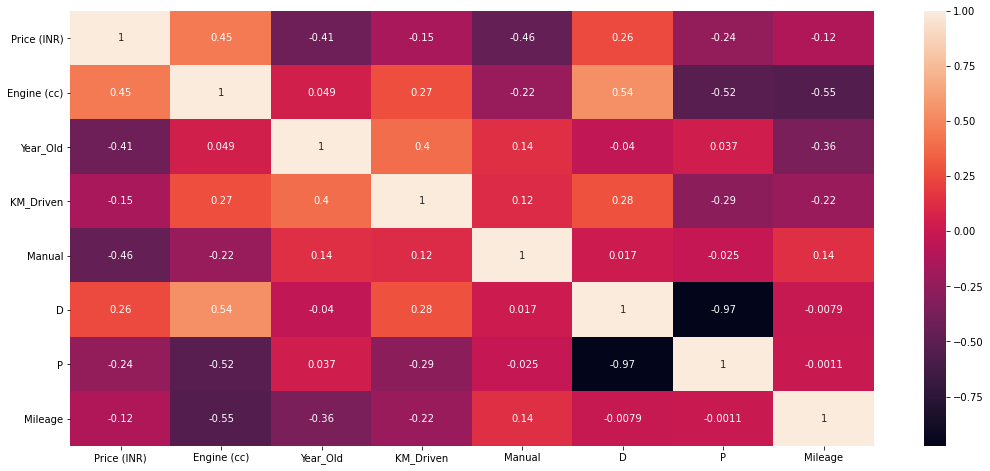

In [51]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(),annot=True);

In [52]:
y = df.pop('Mileage') #will pop the mileage collumn and drop it in y
X = df #remaining data

In [53]:
X.head()

,Price (INR),Engine (cc),Year_Old,KM_Driven,Manual,D,P
0,450000,1248,6,145500,1,1,0
1,370000,1498,6,120000,1,1,0
2,158000,1497,14,140000,1,0,1
3,225000,1396,10,127000,1,1,0
4,130000,1298,13,120000,1,0,1


In [54]:
y.head()

0    23.40
1    21.14
2    17.70
3    23.00
4    16.10
Name: Mileage, dtype: float64

In [55]:
y.shape

(6708,)

## Model Work

In [56]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

In [57]:
model.fit(X, y)

ExtraTreesRegressor()

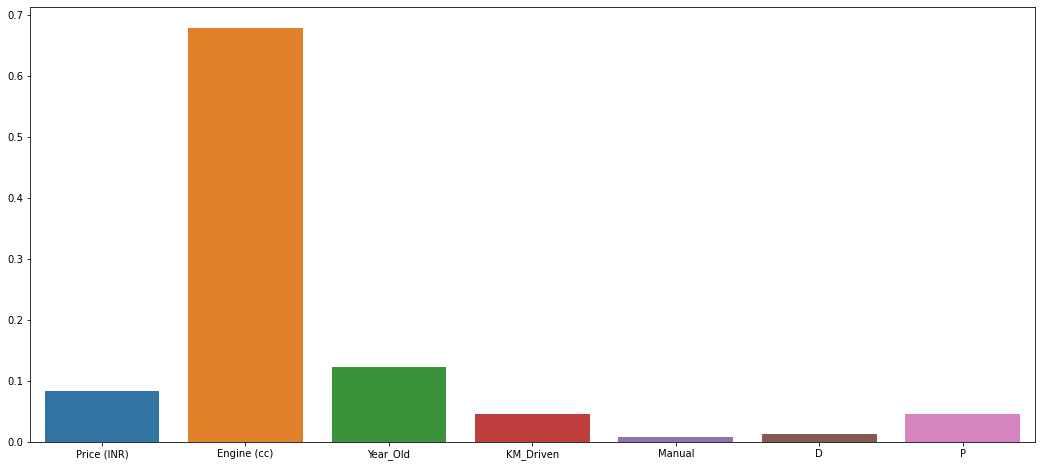

In [58]:
plt.figure(figsize=(18,8))
sns.barplot(x=df.columns, y=model.feature_importances_);

## Train-Test split

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
X_train.shape, X_test.shape

((4695, 7), (2013, 7))

## Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [62]:
reg.fit(X_train, y_train)

LinearRegression()

In [63]:
y_pred = reg.predict(X_test)

In [64]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 4.103310615754939


In [65]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.5028677637187597


## Cross validation with linear regression

In [66]:
from sklearn.model_selection import cross_val_score
def regression_model_cv(model, k=5):
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=k)
    rmse = np.sqrt(-scores)
    print('Reg rmse:', rmse)
    print('Reg mean:', rmse.mean ())

In [67]:
regression_model_cv(LinearRegression())

Reg rmse: [2.66920446 2.47471587 2.46174754 2.48808613 7.84653566]
Reg mean: 3.5880579325589137


In [68]:
regression_model_cv(LinearRegression(), k=3)

Reg rmse: [2.68019395 2.59281515 6.25222421]
Reg mean: 3.8417444403268775


In [69]:
regression_model_cv(LinearRegression(), k=6)

Reg rmse: [2.73037701 2.39392292 2.4737219  2.48026078 2.43962764 8.52563281]
Reg mean: 3.5072571756797473


## Regularization: Ridge and Lasso

In [70]:
from sklearn.linear_model import Ridge
regression_model_cv(Ridge())

Reg rmse: [2.66867912 2.47447957 2.4615682  2.4879998  7.84642671]
Reg mean: 3.587830679622833


In [71]:
from sklearn.linear_model import Lasso
regression_model_cv(Lasso())

Reg rmse: [3.0043655  2.98290793 2.99811687 2.96965457 8.17810747]
Reg mean: 4.0266304665257735


Ridge Performed little better than Lasso

## Random Forest Regressor

In [72]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()

In [73]:
# Hyperparameters
n_estimators = [100,200,300,500]
max_features = ['auto', 'sqrt']
max_depth = [5, 10, 15, 20]

In [74]:
from sklearn.model_selection import RandomizedSearchCV

In [75]:
grid = {'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth
}

In [76]:
clf_cv = RandomizedSearchCV(estimator=clf, param_distributions=grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=42)

In [77]:
clf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.7s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.6s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.6s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.6s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.6s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=500; total time=   1.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=500; total time=   1.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=500; total time=   1.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=500; total time=   1.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=500; total time=   1.0s
[CV] END ..max_depth=20, max_features=auto, n_estimators=100; total time=   0.6s
[CV] END ..max_depth=20, max_features=auto, n_es

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [100, 200, 300, 500]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [78]:
preds = clf_cv.predict(X_test)
preds

array([17.96472024, 22.26363649, 16.85089709, ..., 19.33305804,
       15.71822584, 25.123     ])

In [79]:
from sklearn.metrics import mean_squared_error
rmse_value = mean_squared_error(y_test, preds, squared=False)
rmse_value

1.9650601020995337

In [80]:
print(r2_score(y_test, preds))

0.885986884305592


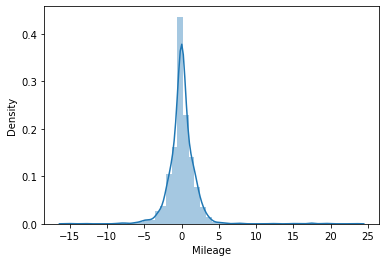

In [81]:
sns.distplot(y_test-preds);